In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download('https://www.kaggle.com/datasets/ckay16/accident-detection-from-cctv-footage')

100%|██████████| 249M/249M [00:02<00:00, 130MB/s]


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
img_size= (256,256)
batch_size = 128

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'accident-detection-from-cctv-footage/data/train',
    image_size=(img_size),
    batch_size=batch_size,
    seed=42
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'accident-detection-from-cctv-footage/data/val',
    image_size=(img_size),
    batch_size=batch_size*2,
    seed=42
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'accident-detection-from-cctv-footage/data/test',
    image_size=(img_size),
    batch_size=batch_size*2,
    seed=42
)

Found 791 files belonging to 2 classes.
Found 98 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [ ]:
class_name = train_ds.class_names
print(class_name)
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

['Accident', 'Non Accident']


In [ ]:
model = tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(256,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(512,3,activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(1024,activation="relu"),
    layers.Dense(len(class_name),activation="softmax")
])
model.compile(optimizer="adam" , loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_ds, validation_data=val_ds,epochs=50)

Epoch 1/50
7/7 [==============================] - 29s 1s/step - loss: 1.8032 - accuracy: 0.5461 - val_loss: 0.7248 - val_accuracy: 0.5306
Epoch 2/50
7/7 [==============================] - 2s 265ms/step - loss: 0.6885 - accuracy: 0.5335 - val_loss: 0.6839 - val_accuracy: 0.5714
Epoch 3/50
7/7 [==============================] - 2s 282ms/step - loss: 0.6762 - accuracy: 0.5904 - val_loss: 0.6845 - val_accuracy: 0.5510
Epoch 4/50
7/7 [==============================] - 2s 266ms/step - loss: 0.6515 - accuracy: 0.6321 - val_loss: 0.8899 - val_accuracy: 0.4898
Epoch 5/50
7/7 [==============================] - 2s 265ms/step - loss: 0.6371 - accuracy: 0.6372 - val_loss: 0.6743 - val_accuracy: 0.6122
Epoch 6/50
7/7 [==============================] - 2s 267ms/step - loss: 0.6088 - accuracy: 0.6738 - val_loss: 0.6934 - val_accuracy: 0.7041
Epoch 7/50
7/7 [==============================] - 2s 267ms/step - loss: 0.5746 - accuracy: 0.7042 - val_loss: 0.7087 - val_accuracy: 0.7143
Epoch 8/50
7/7 [======

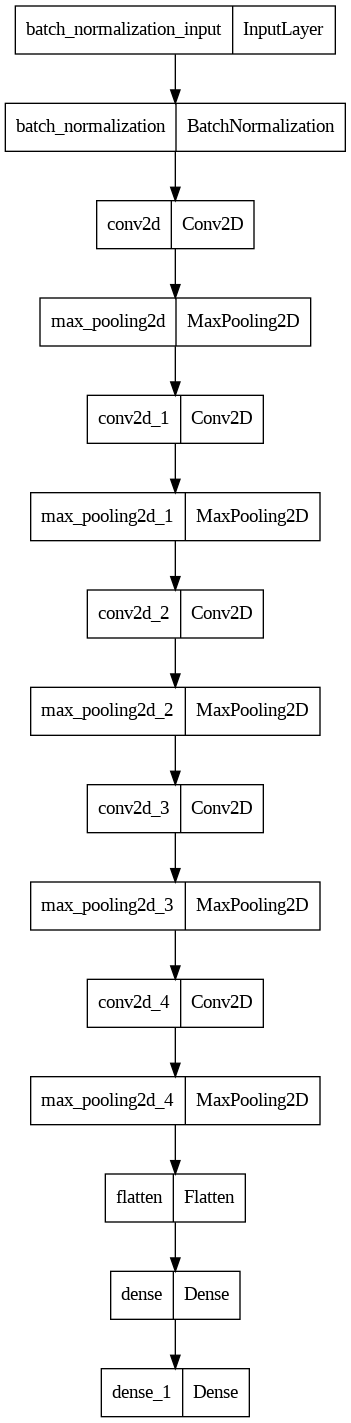

In [ ]:
from keras.utils import plot_model
plot_model(model, show_layer_names=True)

In [ ]:
model.save_weights('model.h5')

In [ ]:
json_model = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(json_model)

In [ ]:
json_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 256, 256, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "batch_normalization_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "BatchNormalization", "config": {"name": "batch_normalization", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0.001, "center": true, "scale": true, "beta_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "gamma_initializer": {"module": "keras.initializers", "class_name": "Ones", "config": {}, "registered_name": null}, "moving_mean_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "moving_variance_initializer": {"module": "keras.initializers", "class_name": "Ones", "config": {}, "registered_name": nu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

In [ ]:
shutil.copy("model.h5","/content/drive/MyDrive/")

'/content/drive/MyDrive/model.h5'